## Let's make a correlation matrix for all our landslide variables

Note that some code is inspired by ChatGPT

In [2]:
# Connect to google drive data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df.columns

NameError: ignored

In [7]:
main_path = '/content/drive/MyDrive/MLGeo23_Landslide_FinalProject/data'

# Load the CSV file into a DataFrame
file_path = main_path + '/data_complete_final.csv'
df = pd.read_csv(file_path)
correlation_df = df
# drop useuless columns
correlation_df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'OBJECTID', 'landslide_ID','CONFIDENCE','MATERIAL','geometry','std_elev','min_rough','max_rough','min_elev','max_elev','std_rough','min_slope','max_slope','std_slope','min_asp','max_asp','std_asp'], axis=1, inplace=True)
correlation_df.columns

# Create a correlation matrix
correlation_matrix = correlation_df.corr()

<ipython-input-7-4c1f0a708e9a>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


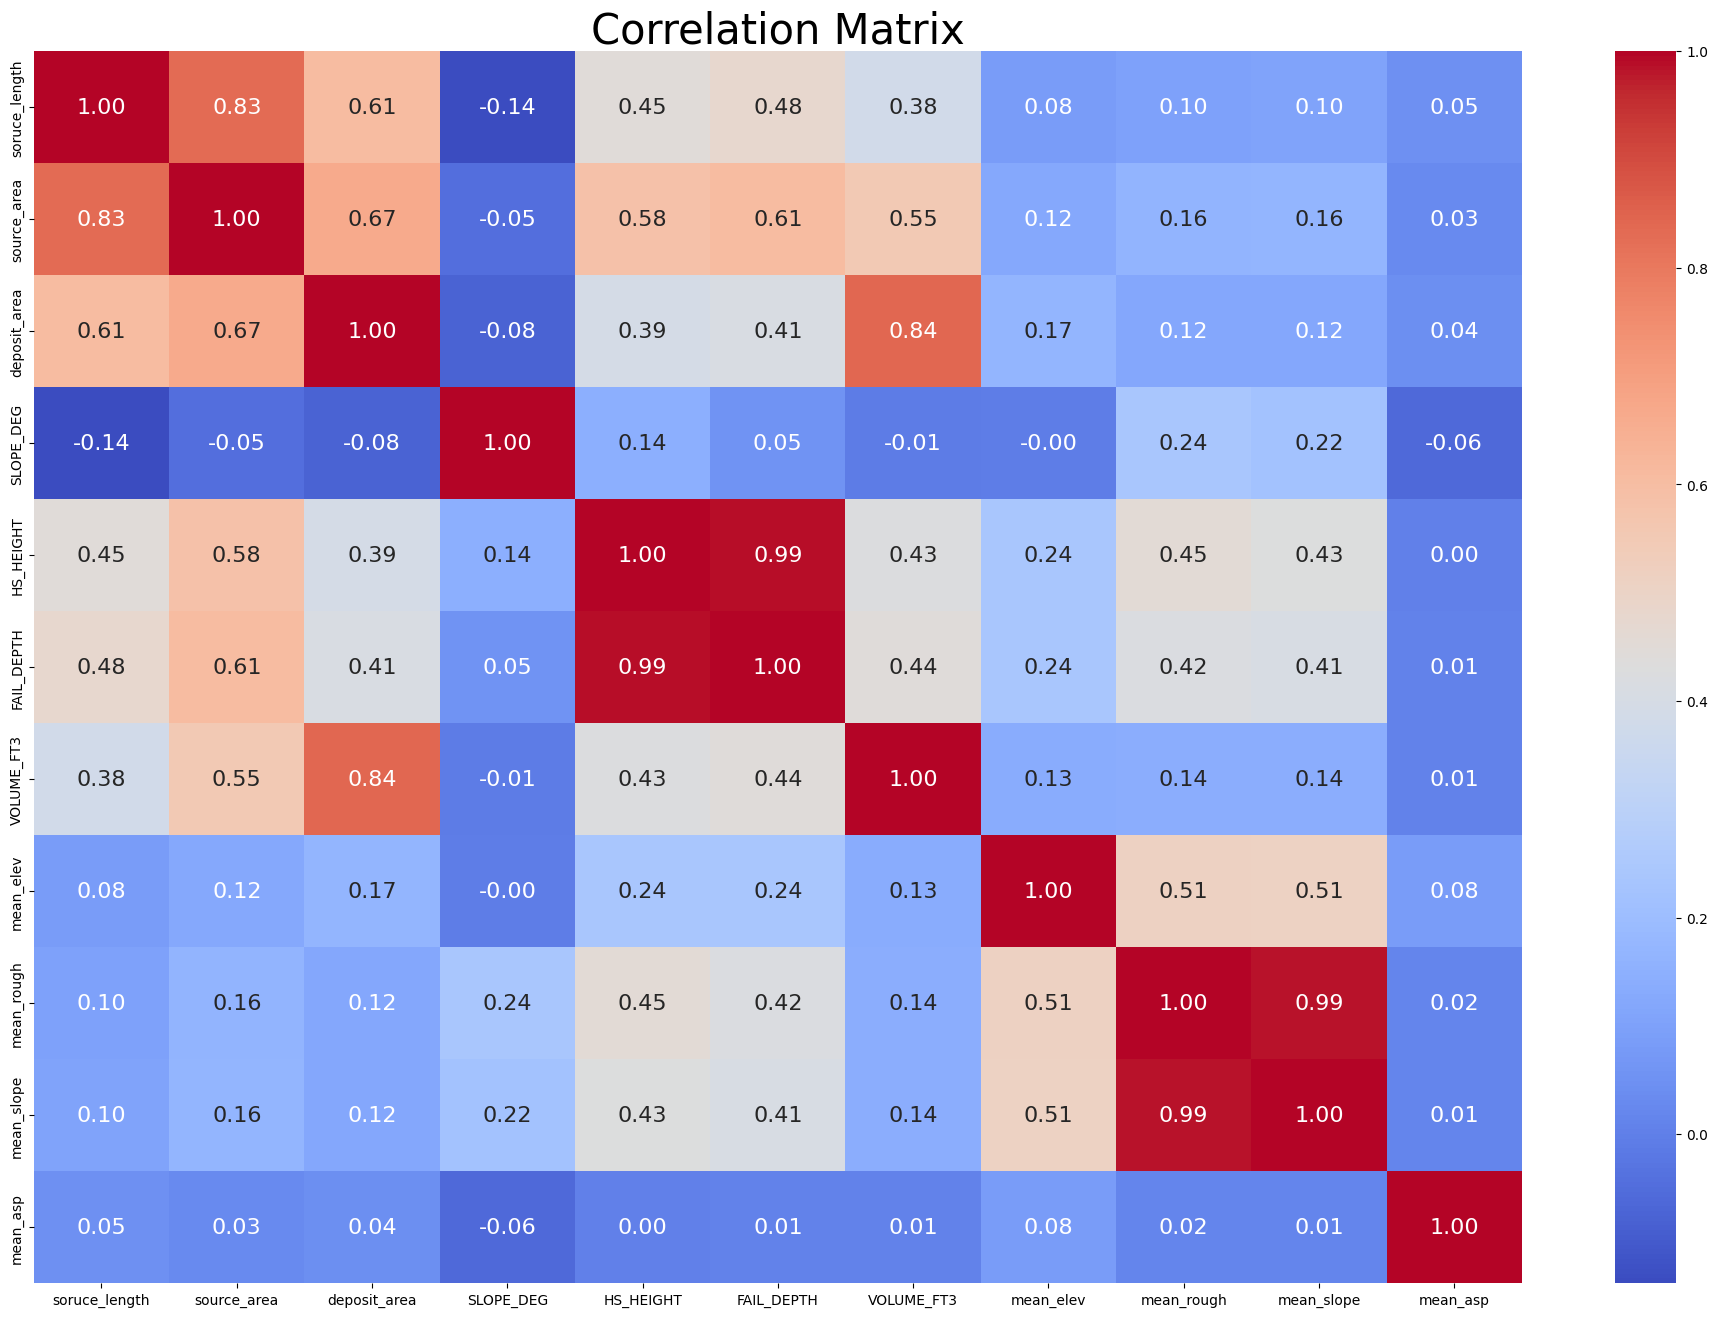

In [18]:
# Display the correlation matrix
path = '/content/drive/MyDrive/MLGeo23_Landslide_FinalProject/deliverables/'
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 16})
plt.title('Correlation Matrix',fontsize=30)
plt.savefig(path + 'Correlation Matrix.png', bbox_inches='tight')
plt.show()

In [ ]:
path = '/content/drive/MyDrive/MLGeo23_Landslide_FinalProject/deliverables/'

## Let's explore our data further with histograms and plots

In [8]:
df.columns

Index(['soruce_length', 'source_area', 'deposit_area', 'SLOPE_DEG',
       'HS_HEIGHT', 'FAIL_DEPTH', 'VOLUME_FT3', 'centroid', 'mean_elev',
       'mean_rough', 'mean_slope', 'mean_asp'],
      dtype='object')

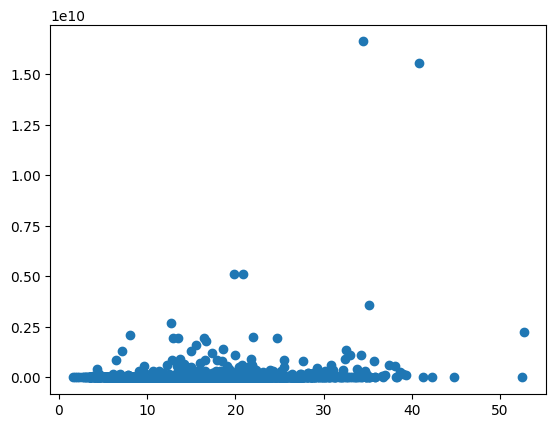

In [37]:
plt.scatter(df['mean_slope'], df['VOLUME_FT3'])

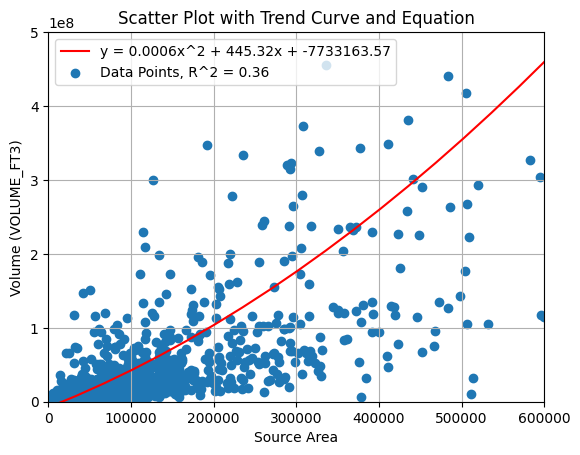

In [48]:
# Calculating the trend curve (quadratic fit)
coefficients = np.polyfit(df['source_area'], df['VOLUME_FT3'], 2)
trend_curve = np.poly1d(coefficients)
equation = f'y = {round(coefficients[0],4)}x^2 + {coefficients[1]:.2f}x + {coefficients[2]:.2f}'

# Calculate R-squared value
predicted_values = trend_curve(df['source_area'])
r_squared = r2_score(df['VOLUME_FT3'], predicted_values)
r_squared_text = f'R^2 = {r_squared:.2f}'

# Plotting the trend curve with the equation and R-squared score
x_values = np.linspace(min(df['source_area']), max(df['source_area']), 100)
plt.plot(x_values, trend_curve(x_values), color='red', label=equation)
#plt.text(0.1, 0.9, r_squared_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='center')

# Scatter plot
plt.scatter(df['source_area'], df['VOLUME_FT3'], label=f'Data Points, {r_squared_text}')

# Labeling axes and title
plt.xlabel('Source Area')
plt.ylabel('Volume (VOLUME_FT3)')
plt.title('Scatter Plot with Trend Curve and Equation')
plt.legend()
plt.ylim(0,0.05*10**10)
plt.xlim(0,0.6*10**6)
plt.grid(True)
plt.show()

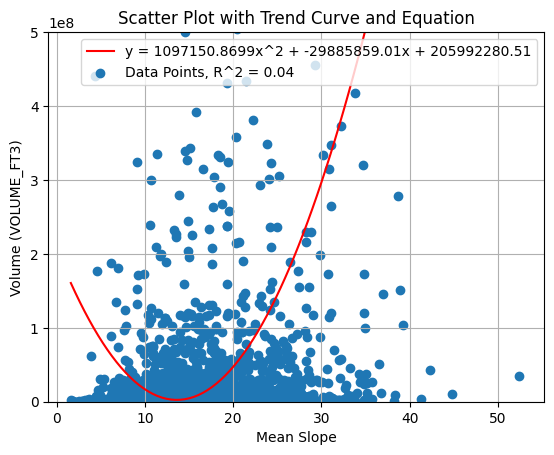

In [53]:

# Calculating the trend curve (quadratic fit)
coefficients = np.polyfit(df['mean_slope'], df['VOLUME_FT3'], 2)
trend_curve = np.poly1d(coefficients)
#equation = f'y = {round(coefficients[0],4)}x^2 + {coefficients[1]:.2f}x + {coefficients[2]:.2f}'

# Calculate R-squared value
predicted_values = trend_curve(df['mean_slope'])
r_squared = r2_score(df['VOLUME_FT3'], predicted_values)
r_squared_text = f'R^2 = {r_squared:.2f}'

# Plotting the trend curve with the equation and R-squared score
x_values = np.linspace(min(df['mean_slope']), max(df['mean_slope']), 100)
plt.plot(x_values, trend_curve(x_values), color='red', label=equation)
#plt.text(0.1, 0.9, r_squared_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='center')

# Scatter plot
plt.scatter(df['mean_slope'], df['VOLUME_FT3'], label=f'Data Points, {r_squared_text}')

# Labeling axes and title
plt.xlabel('Mean Slope')
plt.ylabel('Volume (VOLUME_FT3)')
plt.title('Scatter Plot with Trend Curve and Equation')
plt.legend(loc = 'upper right')
plt.ylim(0,0.05*10**10)
#plt.xlim(0,0.6*10**6)
plt.grid(True)
plt.show()

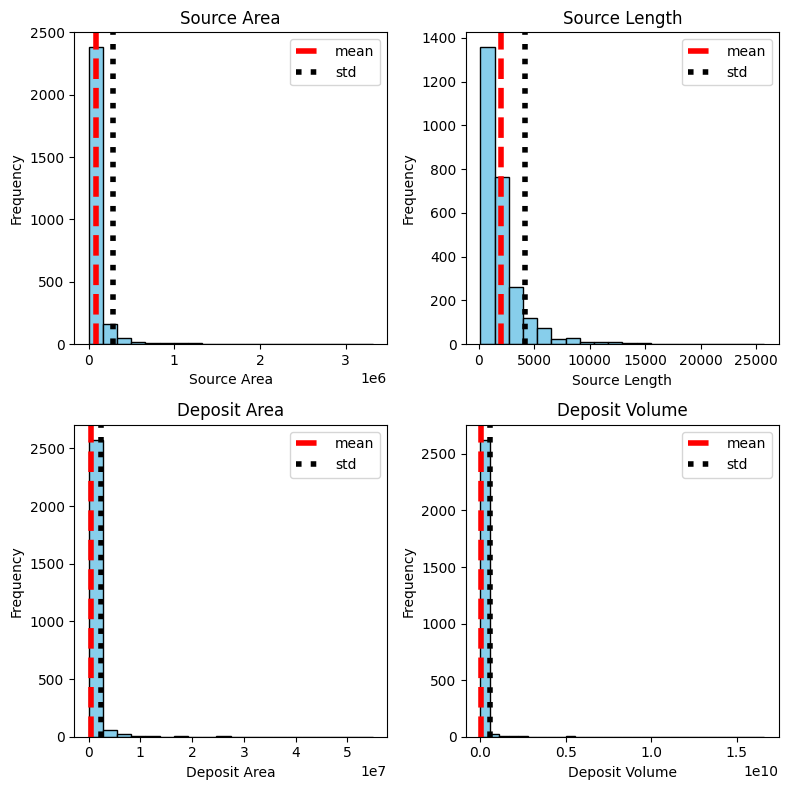

In [19]:
source_area_mean = np.mean(df['source_area'])
source_area_std = np.std(df['source_area'])

source_length_mean = np.mean(df['soruce_length'])
source_length_std = np.std(df['soruce_length'])

deposit_area_mean = np.mean(df['deposit_area'])
deposit_area_std = np.std(df['deposit_area'])

VOLUME_FT3_mean = np.mean(df['VOLUME_FT3'])
VOLUME_FT3_std = np.std(df['VOLUME_FT3'])

# Plotting histograms on separate axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))  # Creating subplots with 2 row and 2 columns

# Histogram for 'source_area'
ax1.hist(df['source_area'], color='skyblue', edgecolor='black', bins = 20)
ax1.set_title('Source Area')
ax1.set_xlabel('Source Area')
ax1.set_ylabel('Frequency')
ax1.axvline(x=source_area_mean, color='red', linestyle='--', linewidth = 4, label = 'mean')
ax1.axvline(x=source_area_std + source_area_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax1.legend()

# Histogram for 'source_length'
ax2.hist(df['soruce_length'], color='skyblue', edgecolor='black', bins = 20)
ax2.set_title('Source Length')
ax2.set_xlabel('Source Length')
ax2.set_ylabel('Frequency')
ax2.axvline(x=source_length_mean, color='red', linestyle='--',linewidth = 4, label = 'mean')
ax2.axvline(x=source_length_std + source_length_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax2.legend()

# Histogram for 'deposit_area'
ax3.hist(df['deposit_area'], color='skyblue', edgecolor='black', bins = 20)
ax3.set_title('Deposit Area')
ax3.set_xlabel('Deposit Area')
ax3.set_ylabel('Frequency')
ax3.axvline(x=deposit_area_mean, color='red', linestyle='--', linewidth = 4, label = 'mean')
ax3.axvline(x=deposit_area_std + deposit_area_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax3.legend()

# Histogram for 'VOLUME_FT3'
ax4.hist(df['VOLUME_FT3'], color='skyblue', edgecolor='black', bins = 30)
ax4.set_title('Deposit Volume')
ax4.set_xlabel('Deposit Volume')
ax4.set_ylabel('Frequency')
ax4.axvline(x=VOLUME_FT3_mean, color='red', linestyle='--',linewidth = 4, label = 'mean')
ax4.axvline(x=VOLUME_FT3_std + VOLUME_FT3_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax4.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(path + 'source-deposit-hists.png', bbox_inches='tight')
plt.show()


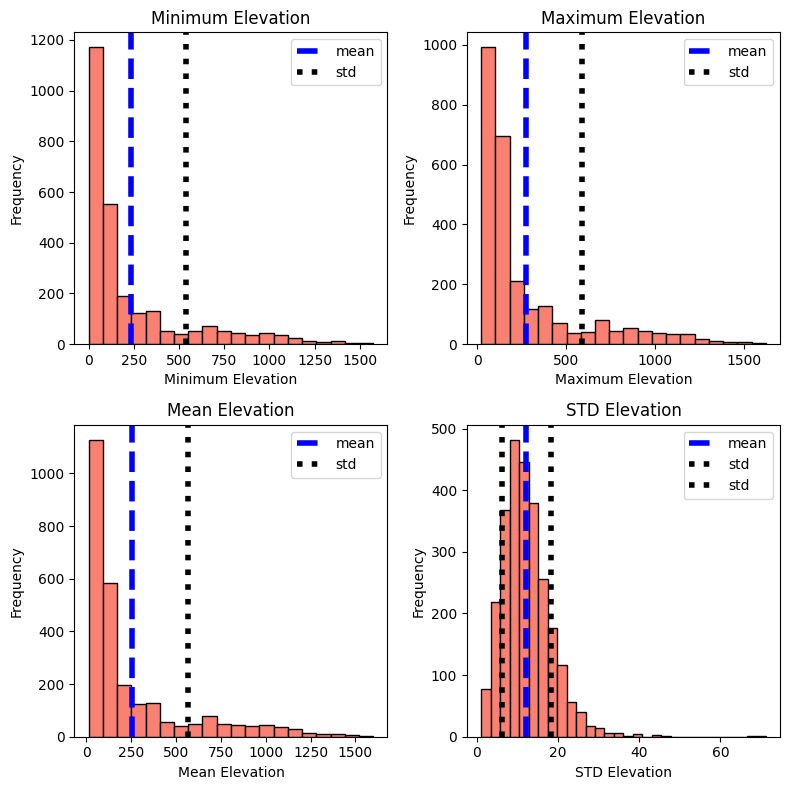

In [ ]:
min_elev_mean = np.mean(df['min_elev'])
min_elev_std = np.std(df['min_elev'])

max_elev_mean = np.mean(df['max_elev'])
max_elev_std = np.std(df['max_elev'])

mean_elev_mean = np.mean(df['mean_elev'])
mean_elev_std = np.std(df['mean_elev'])

std_elev_mean = np.mean(df['std_elev'])
std_elev_std = np.std(df['std_elev'])

# Plotting histograms on separate axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))  # Creating subplots with 2 row and 2 columns

# Histogram for 'min_elev'
ax1.hist(df['min_elev'], color='salmon', edgecolor='black', bins = 20)
ax1.set_title('Minimum Elevation')
ax1.set_xlabel('Minimum Elevation')
ax1.set_ylabel('Frequency')
ax1.axvline(x=min_elev_mean, color='blue', linestyle='--', linewidth = 4, label = 'mean')
ax1.axvline(x=min_elev_std + min_elev_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax1.legend()

# Histogram for 'max_elev'
ax2.hist(df['max_elev'], color='salmon', edgecolor='black', bins = 20)
ax2.set_title('Maximum Elevation')
ax2.set_xlabel('Maximum Elevation')
ax2.set_ylabel('Frequency')
ax2.axvline(x=max_elev_mean, color='blue', linestyle='--',linewidth = 4, label = 'mean')
ax2.axvline(x=max_elev_std + max_elev_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax2.legend()

# Histogram for 'mean_elev'
ax3.hist(df['mean_elev'], color='salmon', edgecolor='black', bins = 20)
ax3.set_title('Mean Elevation')
ax3.set_xlabel('Mean Elevation')
ax3.set_ylabel('Frequency')
ax3.axvline(x=mean_elev_mean, color='blue', linestyle='--', linewidth = 4, label = 'mean')
ax3.axvline(x=mean_elev_std + mean_elev_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax3.legend()

# Histogram for 'std_elev'
ax4.hist(df['std_elev'], color='salmon', edgecolor='black', bins = 30)
ax4.set_title('STD Elevation')
ax4.set_xlabel('STD Elevation')
ax4.set_ylabel('Frequency')
ax4.axvline(x=std_elev_mean, color='blue', linestyle='--',linewidth = 4, label = 'mean')
ax4.axvline(x=std_elev_std + std_elev_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax4.axvline(x= std_elev_mean - std_elev_std, color='k', linestyle=':',linewidth = 4, label = 'std')
ax4.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(path + 'elevation-hists.png', bbox_inches='tight')
plt.show()

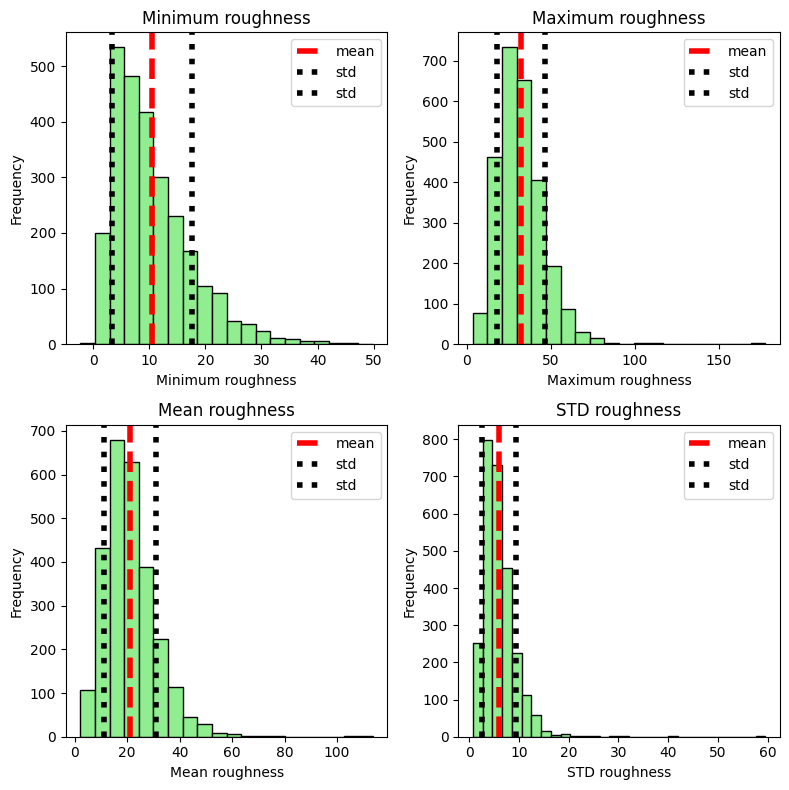

In [ ]:
min_rough_mean = np.mean(df['min_rough'])
min_rough_std = np.std(df['min_rough'])

max_rough_mean = np.mean(df['max_rough'])
max_rough_std = np.std(df['max_rough'])

mean_rough_mean = np.mean(df['mean_rough'])
mean_rough_std = np.std(df['mean_rough'])

std_rough_mean = np.mean(df['std_rough'])
std_rough_std = np.std(df['std_rough'])

# Plotting histograms on separate axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))  # Creating subplots with 2 row and 2 columns

# Histogram for 'min_rough'
ax1.hist(df['min_rough'], color='lightgreen', edgecolor='black', bins = 20)
ax1.set_title('Minimum roughness')
ax1.set_xlabel('Minimum roughness')
ax1.set_ylabel('Frequency')
ax1.axvline(x=min_rough_mean, color='red', linestyle='--', linewidth = 4, label = 'mean')
ax1.axvline(x=min_rough_std + min_rough_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax1.axvline(x=  min_rough_mean - min_rough_std, color='k', linestyle=':',linewidth = 4, label = 'std')
ax1.legend()

# Histogram for 'max_rough'
ax2.hist(df['max_rough'], color='lightgreen', edgecolor='black', bins = 20)
ax2.set_title('Maximum roughness')
ax2.set_xlabel('Maximum roughness')
ax2.set_ylabel('Frequency')
ax2.axvline(x=max_rough_mean, color='red', linestyle='--',linewidth = 4, label = 'mean')
ax2.axvline(x=max_rough_std + max_rough_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax2.axvline(x= max_rough_mean - max_rough_std, color='k', linestyle=':',linewidth = 4, label = 'std')
ax2.legend()

# Histogram for 'mean_rough'
ax3.hist(df['mean_rough'], color='lightgreen', edgecolor='black', bins = 20)
ax3.set_title('Mean roughness')
ax3.set_xlabel('Mean roughness')
ax3.set_ylabel('Frequency')
ax3.axvline(x=mean_rough_mean, color='red', linestyle='--', linewidth = 4, label = 'mean')
ax3.axvline(x=mean_rough_std + mean_rough_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax3.axvline(x= mean_rough_mean - mean_rough_std, color='k', linestyle=':',linewidth = 4, label = 'std')
ax3.legend()

# Histogram for 'std_rough'
ax4.hist(df['std_rough'], color='lightgreen', edgecolor='black', bins = 30)
ax4.set_title('STD roughness')
ax4.set_xlabel('STD roughness')
ax4.set_ylabel('Frequency')
ax4.axvline(x=std_rough_mean, color='red', linestyle='--',linewidth = 4, label = 'mean')
ax4.axvline(x=std_rough_std + std_rough_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax4.axvline(x= std_rough_mean - std_rough_std, color='k', linestyle=':',linewidth = 4, label = 'std')
ax4.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(path + 'roughness-hists.png', bbox_inches='tight')
plt.show()

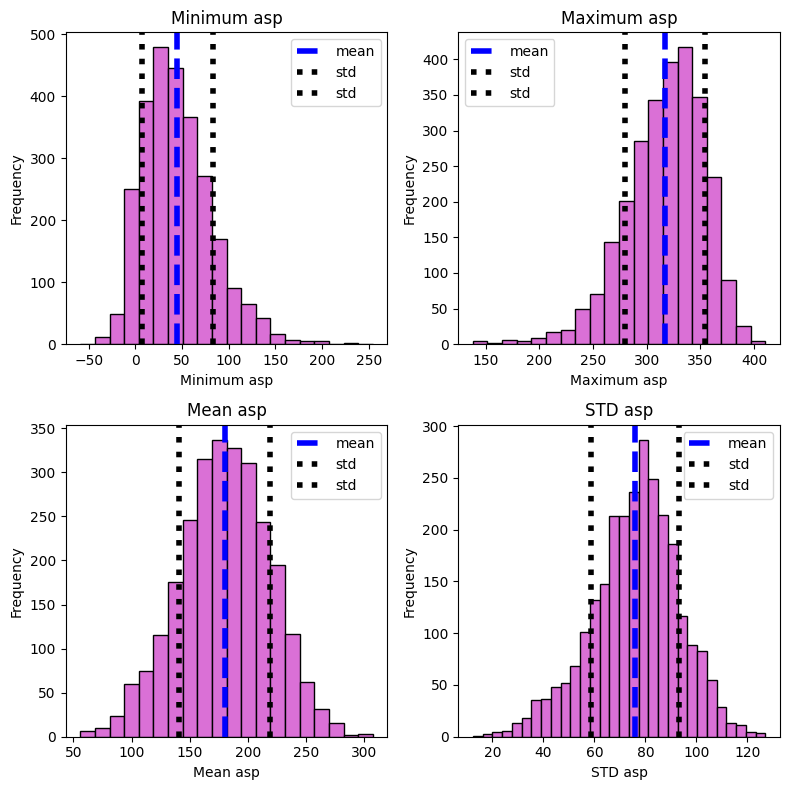

In [ ]:
min_asp_mean = np.mean(df['min_asp'])
min_asp_std = np.std(df['min_asp'])

max_asp_mean = np.mean(df['max_asp'])
max_asp_std = np.std(df['max_asp'])

mean_asp_mean = np.mean(df['mean_asp'])
mean_asp_std = np.std(df['mean_asp'])

std_asp_mean = np.mean(df['std_asp'])
std_asp_std = np.std(df['std_asp'])

# Plotting histograms on separate axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))  # Creating subplots with 2 row and 2 columns

# Histogram for 'min_asp'
ax1.hist(df['min_asp'], color='orchid', edgecolor='black', bins = 20)
ax1.set_title('Minimum asp')
ax1.set_xlabel('Minimum asp')
ax1.set_ylabel('Frequency')
ax1.axvline(x=min_asp_mean, color='blue', linestyle='--', linewidth = 4, label = 'mean')
ax1.axvline(x=min_asp_std + min_asp_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax1.axvline(x=min_asp_mean - min_asp_std, color='k', linestyle=':', linewidth = 4, label = 'std')
ax1.legend()

# Histogram for 'max_asp'
ax2.hist(df['max_asp'], color='orchid', edgecolor='black', bins = 20)
ax2.set_title('Maximum asp')
ax2.set_xlabel('Maximum asp')
ax2.set_ylabel('Frequency')
ax2.axvline(x=max_asp_mean, color='blue', linestyle='--',linewidth = 4, label = 'mean')
ax2.axvline(x=max_asp_std + max_asp_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax2.axvline(x=max_asp_mean - max_asp_std, color='k', linestyle=':', linewidth = 4, label = 'std')
ax2.legend()

# Histogram for 'mean_asp'
ax3.hist(df['mean_asp'], color='orchid', edgecolor='black', bins = 20)
ax3.set_title('Mean asp')
ax3.set_xlabel('Mean asp')
ax3.set_ylabel('Frequency')
ax3.axvline(x=mean_asp_mean, color='blue', linestyle='--', linewidth = 4, label = 'mean')
ax3.axvline(x=mean_asp_std + mean_asp_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax3.axvline(x=mean_asp_mean - mean_asp_std, color='k', linestyle=':', linewidth = 4, label = 'std')
ax3.legend()

# Histogram for 'std_asp'
ax4.hist(df['std_asp'], color='orchid', edgecolor='black', bins = 30)
ax4.set_title('STD asp')
ax4.set_xlabel('STD asp')
ax4.set_ylabel('Frequency')
ax4.axvline(x=std_asp_mean, color='blue', linestyle='--',linewidth = 4, label = 'mean')
ax4.axvline(x=std_asp_std + std_asp_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax4.axvline(x= std_asp_mean - std_asp_std, color='k', linestyle=':',linewidth = 4, label = 'std')
ax4.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(path + 'asp-hists.png', bbox_inches='tight')
plt.show()

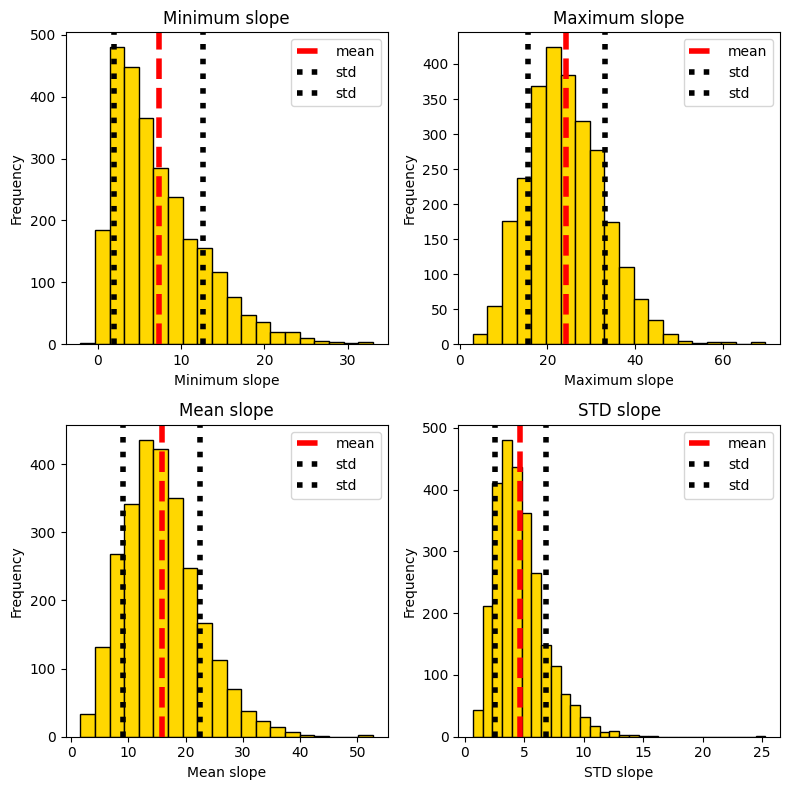

In [ ]:
min_slope_mean = np.mean(df['min_slope'])
min_slope_std = np.std(df['min_slope'])

max_slope_mean = np.mean(df['max_slope'])
max_slope_std = np.std(df['max_slope'])

mean_slope_mean = np.mean(df['mean_slope'])
mean_slope_std = np.std(df['mean_slope'])

std_slope_mean = np.mean(df['std_slope'])
std_slope_std = np.std(df['std_slope'])

# Plotting histograms on separate axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))  # Creating subplots with 2 row and 2 columns

# Histogram for 'min_slope'
ax1.hist(df['min_slope'], color='gold', edgecolor='black', bins = 20)
ax1.set_title('Minimum slope')
ax1.set_xlabel('Minimum slope')
ax1.set_ylabel('Frequency')
ax1.axvline(x=min_slope_mean, color='red', linestyle='--', linewidth = 4, label = 'mean')
ax1.axvline(x=min_slope_std + min_slope_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax1.axvline(x=min_slope_mean - min_slope_std, color='k', linestyle=':', linewidth = 4, label = 'std')
ax1.legend()

# Histogram for 'max_slope'
ax2.hist(df['max_slope'], color='gold', edgecolor='black', bins = 20)
ax2.set_title('Maximum slope')
ax2.set_xlabel('Maximum slope')
ax2.set_ylabel('Frequency')
ax2.axvline(x=max_slope_mean, color='red', linestyle='--',linewidth = 4, label = 'mean')
ax2.axvline(x=max_slope_std + max_slope_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax2.axvline(x=max_slope_mean - max_slope_std, color='k', linestyle=':', linewidth = 4, label = 'std')
ax2.legend()

# Histogram for 'mean_slope'
ax3.hist(df['mean_slope'], color='gold', edgecolor='black', bins = 20)
ax3.set_title('Mean slope')
ax3.set_xlabel('Mean slope')
ax3.set_ylabel('Frequency')
ax3.axvline(x=mean_slope_mean, color='red', linestyle='--', linewidth = 4, label = 'mean')
ax3.axvline(x=mean_slope_std + mean_slope_mean, color='k', linestyle=':', linewidth = 4, label = 'std')
ax3.axvline(x=mean_slope_mean - mean_slope_std, color='k', linestyle=':', linewidth = 4, label = 'std')
ax3.legend()

# Histogram for 'std_slope'
ax4.hist(df['std_slope'], color='gold', edgecolor='black', bins = 30)
ax4.set_title('STD slope')
ax4.set_xlabel('STD slope')
ax4.set_ylabel('Frequency')
ax4.axvline(x=std_slope_mean, color='red', linestyle='--',linewidth = 4, label = 'mean')
ax4.axvline(x=std_slope_std + std_slope_mean, color='k', linestyle=':',linewidth = 4, label = 'std')
ax4.axvline(x= std_slope_mean - std_slope_std, color='k', linestyle=':',linewidth = 4, label = 'std')
ax4.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(path + 'slope-hists.png', bbox_inches='tight')
plt.show()